<a href="https://colab.research.google.com/github/Radhika02005/LDA_Training/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
 import pandas as pd
 # URL to Github repository
 url = "https://raw.githubusercontent.com/IngoNowitzky/LDA_Medium/main/production_line_data.csv"
 # Read csv to DataFrame
 data = pd.read_csv(url)
 # Print first 5 lines
 data.head()

,Station_1,Station_2,Station_3,Station_4,Station_5,Station_6,Station_7,Label
0,0.749080,0.919993,114.945602,0.932442,13.727151,2.903895,0.908278,Good
1,1.901429,-1.261952,104.740889,2.048815,9.016888,2.634858,3.778081,Good
2,1.463988,-0.613441,106.317961,-1.294561,14.625247,1.755185,4.307704,Good
3,1.197317,0.653123,109.033556,-2.686570,13.902569,2.466063,3.553937,Good
4,0.312037,-0.071643,110.182667,-2.449227,14.431973,1.825483,3.623181,Good


In [32]:
# Show average, min and max of numerical values
data.describe()

,Station_1,Station_2,Station_3,Station_4,Station_5,Station_6,Station_7
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.998689,-0.002472,125.000210,-0.995950,11.487429,2.505333,3.494414
std,0.577006,1.151520,14.441149,2.294479,2.027949,1.446818,2.020641
min,0.000023,-1.999978,100.000422,-4.998960,8.000205,0.000138,0.000398
25%,0.499774,-0.998176,112.549949,-2.977451,9.709597,1.242712,1.737593
50%,0.997864,0.004245,124.999161,-0.988751,11.509644,2.513874,3.492975
75%,1.498282,0.984467,137.607742,0.998488,13.253729,3.761920,5.240301
max,1.999850,1.999604,149.998607,2.999001,14.999944,4.999313,6.999449


In [33]:
 # Count the number of good and bad parts
 label_counts = data['Label'].value_counts()
 # Display the results
 print("Number of Good and Bad Parts:")
 print(label_counts)

Number of Good and Bad Parts:
Label
Good    19031
Bad       969
Name: count, dtype: int64


In [34]:
 # Select all bad parts
 bad_parts = data[data['Label'] == 'Bad']
 # Randomly select an equal number of good parts
 good_parts = data[data['Label'] == 'Good'].sample(n=len(bad_parts), random_state=42)
 # Combine both subsets to create a balanced dataset
 balanced_data = pd.concat([bad_parts, good_parts])
 # Shuffle the combined dataset
 balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
 # Display the number of good and bad parts in the balanced dataset
 print("Number of Good and Bad Parts in the balanced dataset:")
 print(balanced_data['Label'].value_counts())

Number of Good and Bad Parts in the balanced dataset:
Label
Bad     969
Good    969
Name: count, dtype: int64


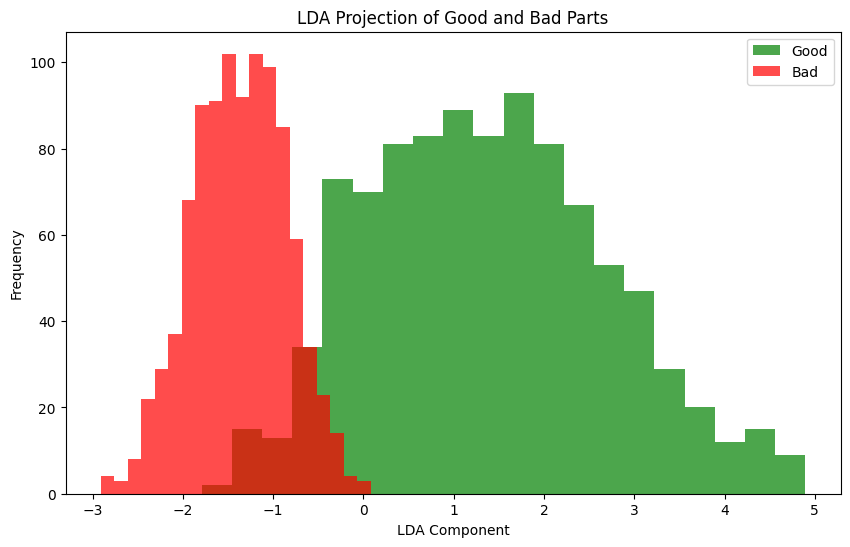

Feature Contributions to LDA Component:
     Feature  LDA Coefficient
3  Station_4         2.438930
6  Station_7         1.763346
5  Station_6         0.179613
0  Station_1         0.030469
4  Station_5        -0.017389
2  Station_3        -0.028781
1  Station_2        -2.023487


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate features and labels
X = balanced_data.drop(columns=['Label'])
y = balanced_data['Label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)  # Fit the model and project the data

# Convert y to NumPy for indexing in plotting
y_np = y.to_numpy()

# Plot the LDA projection
plt.figure(figsize=(10, 6))
plt.hist(X_lda[y_np == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
plt.hist(X_lda[y_np == 'Bad'], bins=20, alpha=0.7, label='Bad', color='red')
plt.title("LDA Projection of Good and Bad Parts")
plt.xlabel("LDA Component")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Examine feature contributions to the LDA component
feature_importance = pd.DataFrame({'Feature': X.columns, 'LDA Coefficient': lda.coef_[0]})
feature_importance = feature_importance.sort_values(by='LDA Coefficient', ascending=False)

# Display feature importance
print("Feature Contributions to LDA Component:")
print(feature_importance)

In [36]:
import numpy as np

# Determine if a sample is a good or bad part based on the conditions
data['Label'] = np.where(
    (data['Station_2'] > 0.5) & (data['Station_4'] < -2.5) & (data['Station_7'] < 3),
    'Bad',
    'Good'
)




1.   List item
2.   List item

